In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import skew
%matplotlib inline
rcParams['figure.figsize'] = (12.0, 6.0)

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(f'train shape : {df_train.shape}')
print(f'test shape : {df_test.shape}')

train shape : (1460, 81)
test shape : (1459, 80)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
print(f'numerical feature: {df_train.describe().shape}')
df_train.describe()

numerical feature: (8, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
print(f"numerical feature: {df_train.describe(include='O').shape}")
df_train.describe(include='O')

numerical feature: (4, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


523     184750
691     755000
1182    745000
1298    160000
Name: SalePrice, dtype: int64


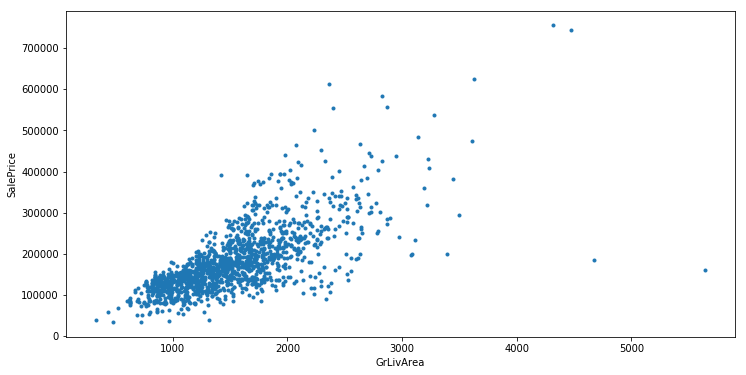

In [11]:
plt.plot(df_train.GrLivArea, df_train.SalePrice, '.')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
print(df_train[df_train.GrLivArea > 4000].SalePrice)

496     430000
523     184750
1298    160000
Name: SalePrice, dtype: int64


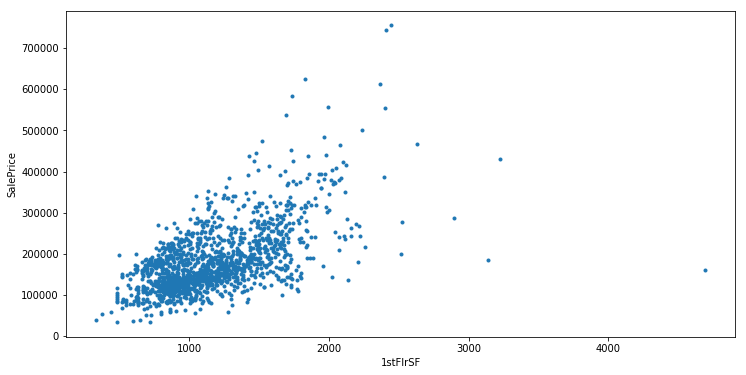

In [13]:
plt.plot(df_train['1stFlrSF'],df_train['SalePrice'], '.')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
print(df_train[df_train['1stFlrSF']>3000].SalePrice)

In [14]:
df_train = df_train.drop( labels = df_train[ df_train.GrLivArea > 4500].index, axis = 0)
print(df_train[df_train.GrLivArea > 4000].SalePrice)

691     755000
1182    745000
Name: SalePrice, dtype: int64


H:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


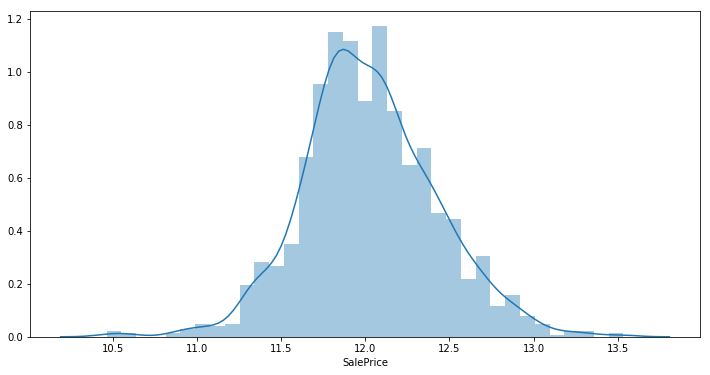

In [15]:
sns.distplot(np.log(df_train.SalePrice))

In [25]:
numeric_data = df_train._get_numeric_data()
numeric_data.columns
# numeric_features = df_train.select_dtypes(include=[np.number])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [19]:
for i in numeric_data:
    temp = df_train[i].dropna()
    print(f"there are {df_train[i].shape[0] - temp.shape[0]} NaN in {i}")
#     sns.distplot(temp)
#     plt.show()

there are 0 NaN in Id
there are 0 NaN in MSSubClass
there are 259 NaN in LotFrontage
there are 0 NaN in LotArea
there are 0 NaN in OverallQual
there are 0 NaN in OverallCond
there are 0 NaN in YearBuilt
there are 0 NaN in YearRemodAdd
there are 8 NaN in MasVnrArea
there are 0 NaN in BsmtFinSF1
there are 0 NaN in BsmtFinSF2
there are 0 NaN in BsmtUnfSF
there are 0 NaN in TotalBsmtSF
there are 0 NaN in 1stFlrSF
there are 0 NaN in 2ndFlrSF
there are 0 NaN in LowQualFinSF
there are 0 NaN in GrLivArea
there are 0 NaN in BsmtFullBath
there are 0 NaN in BsmtHalfBath
there are 0 NaN in FullBath
there are 0 NaN in HalfBath
there are 0 NaN in BedroomAbvGr
there are 0 NaN in KitchenAbvGr
there are 0 NaN in TotRmsAbvGrd
there are 0 NaN in Fireplaces
there are 81 NaN in GarageYrBlt
there are 0 NaN in GarageCars
there are 0 NaN in GarageArea
there are 0 NaN in WoodDeckSF
there are 0 NaN in OpenPorchSF
there are 0 NaN in EnclosedPorch
there are 0 NaN in 3SsnPorch
there are 0 NaN in ScreenPorch
there 

In [21]:
df_all = pd.concat([df_train.drop(['Id','SalePrice'],axis = 1),
                    df_test.drop(['Id'],axis = 1)],
                   axis = 0, ignore_index = False)

In [27]:
print(df_all.shape)
df_na = df_all.select_dtypes(exclude = ['object']).isnull().sum()
print(df_na[df_na>100].sort_values(ascending = False))

(2917, 78)
GarageYrBlt    159
dtype: int64


In [23]:
df_all = df_all.drop(['LotFrontage'], axis = 1)
print(df_all.shape)

(2917, 78)


In [ ]:
df_train[['MSSubClass','SalePrice']].groupby(['MSSubClass']).agg